<a href="https://colab.research.google.com/github/princeofpython/IndiaMart-Hackathon-2k19/blob/nikversion/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase-1 IndiaMART Hackathon
This notebook is our a working prototype solution to gauge the appropriate unit wise price range for the 3 categories(Gloves,Kurtas,Drills) based on their units by removing outliers from the data.

**Instructions for running this notebook**


*   Jupyter notebook is needed to run this notebook if it is not available Please use Colab from google  to run it.
*   required libraries to run this notebook are pandas,numpy,seaborn and scipy.
*   Incase you are running this notebook please make sure all **.csv** files are uploaded 











In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.signal import argrelextrema
from scipy import stats

we can import the required data either from the folder or our git repository.
The given .xlsx file is split into Three parts and and converted to .csv file which is easy to handle.

In [0]:
try:
  phasedf = pd.read_csv('./phaase2.csv')
except:
  try:
    phasedf = pd.read_csv('https://raw.githubusercontent.com/princeofpython/IndiaMart-Hackathon-2k19/nikversion/phase2.csv')
  except:
    print("no file found and no internet connection")


the following piece of code prints out all unique units of the three item given

In [4]:
mc=phasedf['Mcat Name'].unique()
print(mc,'maini category')
sc=phasedf['Subcat name'].unique()
print(sc,'sub category')
allunits=phasedf['PC_ITEM_MOQ_UNIT_TYPE'].unique()
print(allunits,'units')

['HMI Touch Panel' 'AC Motors' 'Single Phase Induction Motors'
 'Three Phase Induction Motor' 'Refrigeration Compressors'
 'Compressor Oil' 'Desiccant Dryers' 'Rotary Screw Compressors'
 'High Pressure Air Compressor' 'Tractor Mounted Air Compressor'
 'Single Stage Reciprocating Compressor' 'Diesel Air Compressor'
 'Pneumatic Impact Wrenches' 'Air Spray Gun' 'Fleece Fabrics'
 'Lining Fabric' 'Audio Amplifiers' 'Belt Conveyors' 'Conveyor Chains'
 'Aluminum Cables' 'Optical Fiber' 'Roller Conveyor'
 'Rubber Conveyor Belt' 'PVC Cables' 'Slat Conveyor' 'Copper Cables'
 'Stainless Steel Cable Tie' 'Heat Resistant Conveyor Belt'
 'Camera Lenses' 'Sony Digital Camera' 'Canon Digital Camera'
 'Porcelain Tiles' 'CNC Milling Machine' 'Drum Mixers'
 'Leather Flash Drive' 'Knitted Yarn' 'Polyester Thread' 'Spun Yarn'
 'Textile Yarn' 'Pouch Filling Machine' 'Powder Filling Machine'
 'Tube Filling Machine' 'Twisted Yarn' 'Bottle Filling Machines'
 'Polyester Filament Yarn' 'Roti Makers' 'Liquid Fill

The following three cells prints out the count of each unique unts.

In [5]:
phasedf['Subcat name'].value_counts()

Belt Conveyor, Roller Conveyor, Screw Conveyors and Conveyor Systems                1358
Ladies Suits, Tops, Designer Dresses, Apparels & Garments                            976
Filling Machines and Bottling Plants                                                 722
Fertilizers, Manures, Plant & Soil Nutrients                                         656
Washing Machine, Microwave Oven, Induction Cooker & Home Appliances                  562
God Statues,Frames,Yantras, Pyramids & Feng Shui Products                            530
Yarn, Threads and Fibers                                                             473
Air Compressors, Gas Compressors, Air Compressor Accessories & Compressor Parts      351
AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units          329
Cables, Conductors, Wires & Accessories                                              278
Actuators, Commutator, Servo Motors, Electric Motors & Components                    257
Voltage Stabilizers, 

In [6]:
phasedf['Mcat Name'].value_counts()

Ladies Palazzo                      860
Bio Fertilizers                     656
Marble God Statue                   530
Belt Conveyors                      525
Roller Conveyor                     312
Rubber Conveyor Belt                304
HMI Touch Panel                     302
Liquid Filling Machine              230
Electric Irons                      214
Bottle Filling Machines             207
Copper Earthing Electrode           166
Juicer Mixer Grinder                164
Bucket Elevator                     151
Eco Friendly Disposable Plates      136
Polyester Thread                    124
Three Phase Induction Motor         121
Dyed Polyester Yarn                 121
Womens Capri                        116
Fleece Fabrics                      115
Porcelain Tiles                     107
Biometric Devices                   106
High Pressure Air Compressor        100
Copper Cables                       100
Acme Safety Shoes                    98
Backhoe Loader                       91


In [7]:
phasedf['PC_ITEM_MOQ_UNIT_TYPE'].value_counts()


Piece              4367
Unit               1788
Kilogram            750
Meter               708
Set                 232
Number              199
Litre               162
Pair                150
Box                 142
Square Feet         117
Square Meter         81
Bag                  77
Packet               69
Feet                 58
Bottle               54
Piece(s)             37
Inch                 31
Pack                 29
Foot                 25
No                   24
Roll                 23
Ton                  22
Cubic Feet           16
kg                   14
Liter                11
Nos                  10
Barrel                9
Bundle                8
Metric Ton            7
Unit(s)               7
                   ... 
per sq.ft.            1
Kg                    1
per nos               1
box                   1
1 Set                 1
Pouch                 1
Gallon                1
numbers               1
Pc_Onwards            1
PER KG                1
peice           

The following lists are accepted entries for units 

In [0]:
dict_of_Mcat = {k: v for k, v in phasedf.groupby('Mcat Name')}

In [0]:
zScore_Mcat={}
npa={}
stdev={}
for i in mc:
  zScore_Mcat[i]=np.abs(stats.zscore(dict_of_Mcat[i]['PC_ITEM_FOB_PRICE']))
  npa[i]=dict_of_Mcat[i][(zScore_Mcat[i] < 3)]['PC_ITEM_FOB_PRICE']
  stdev[i]=np.std(npa[i])
  
  

In [10]:
for i in mc:
  print(i,npa[i].shape[0],dict_of_Mcat[i].shape[0])

HMI Touch Panel 298 302
AC Motors 59 61
Single Phase Induction Motors 73 75
Three Phase Induction Motor 118 121
Refrigeration Compressors 27 28
Compressor Oil 31 33
Desiccant Dryers 12 13
Rotary Screw Compressors 66 68
High Pressure Air Compressor 97 100
Tractor Mounted Air Compressor 34 35
Single Stage Reciprocating Compressor 53 54
Diesel Air Compressor 20 20
Pneumatic Impact Wrenches 42 43
Air Spray Gun 32 33
Fleece Fabrics 113 115
Lining Fabric 52 53
Audio Amplifiers 70 71
Belt Conveyors 514 525
Conveyor Chains 88 89
Aluminum Cables 70 71
Optical Fiber 30 31
Roller Conveyor 306 312
Rubber Conveyor Belt 303 304
PVC Cables 74 76
Slat Conveyor 83 85
Copper Cables 98 100
Stainless Steel Cable Tie 26 27
Heat Resistant Conveyor Belt 41 43
Camera Lenses 29 30
Sony Digital Camera 31 31
Canon Digital Camera 50 51
Porcelain Tiles 106 107
CNC Milling Machine 36 37
Drum Mixers 20 21
Leather Flash Drive 24 24
Knitted Yarn 31 31
Polyester Thread 123 124
Spun Yarn 60 63
Textile Yarn 35 37
Pouch F

# Calculating Z-score
Z-score is meausure of how much given sample is deviating compared to Standaed deviation.
In python the function is available in scipy.stats which we are using in the following cells

**note:**we are calculating only abolsolute values as sign of z-score doesn't matter in finding outliers

we are not using this part for now.





In [0]:
drill_cl=drilldf[drilldf['Unit'].isin(d_entries)]
glove_cl=glovedf[glovedf['Unit'].isin(g_entries)]
kurta_cl=kurtadf[kurtadf['Unit'].isin(k_entries)]

In [0]:
drill_cl.describe()

,Price
count,168.000000
mean,6042.964286
std,9341.145784
min,2.000000
25%,1999.750000
50%,2745.000000
75%,5636.750000
max,55000.000000


In [0]:
drill_z = np.abs(stats.zscore(drill_cl['Price']))
glove_z = np.abs(stats.zscore(glove_cl['Price']))
kurta_z = np.abs(stats.zscore(kurta_cl['Price']))

After obtaing z-score we are not considering all entries whse z-score is greater than 3 or less than -3 and also we are considering only some units values as unit conversion is not as indicative as the sugar example given.

In [0]:
npa=drill_cl[(drill_z < 3)]['Price']
npa1=glove_cl[(glove_z < 3)]['Price']
npa2=kurta_cl[(kurta_z < 3)]['Price'][:-1]

The following 3 cells describe the data taken for consideration

In [0]:
drill_cl[(drill_z < 3)].describe()

,Price
count,161.000000
mean,4363.602484
std,4399.815752
min,2.000000
25%,1906.000000
50%,2699.000000
75%,5200.000000
max,28000.000000


In [0]:
glove_cl[(glove_z < 3)].describe()

,Price
count,116.000000
mean,102.922414
std,68.288156
min,10.000000
25%,50.000000
50%,80.000000
75%,171.250000
max,350.000000


In [0]:
kurta_cl[(kurta_z < 3)].describe()

,Price
count,4013.000000
mean,698.637179
std,681.340749
min,1.000000
25%,325.000000
50%,500.000000
75%,800.000000
max,6589.000000


The following cell is used to store standard deviation which is very important to calculate the bandwidth in later part

In [0]:
stdev=np.std(npa)
stdev1=np.std(npa1)
stdev2=np.std(npa2)
print(stdev,stdev1,stdev2)

4386.130444567741 67.99317294101957 674.9628964771468


# Kernel Density estimation method for calculation of Probabilty Disribution Function
we are using probability distribution function for find ing require range as pdf is more suitable for finding relationship in general population.

kernel Density Estimation is useful method for calculating pdf from discret samples.



In [0]:
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

In [0]:
def correct(pdf,w,y_grid):
  for a in range(len(pdf)):
    if y_grid[a] > 0:
      break
  probab=np.sum(pdf[a:])*w
  for a in range(len(pdf)):
    if y_grid[a] > 0:
      break
    pdf[a]=0
  return pdf/probab

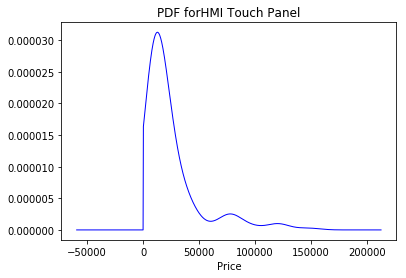

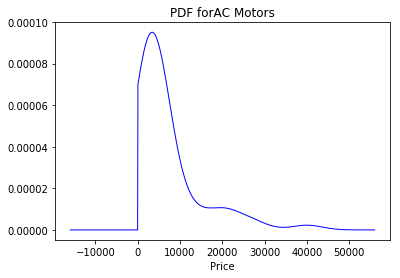

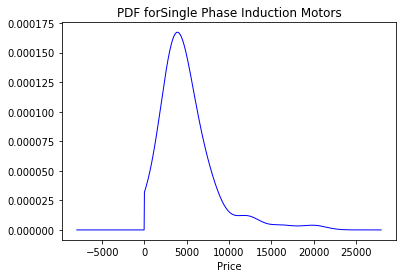

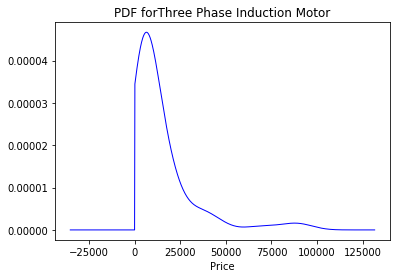

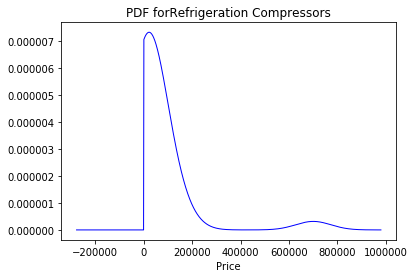

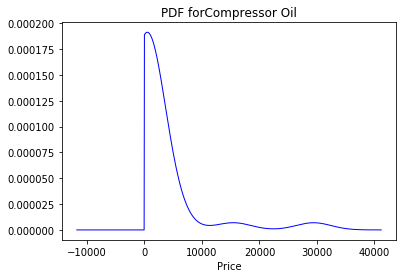

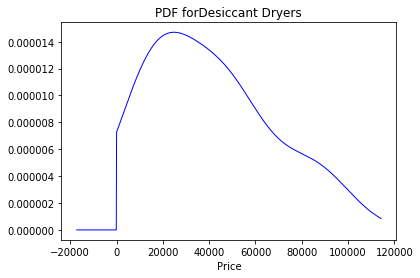

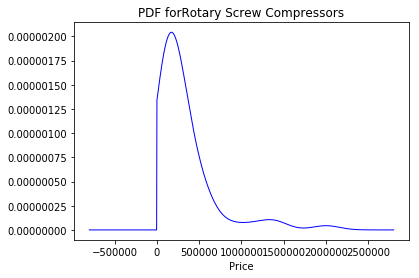

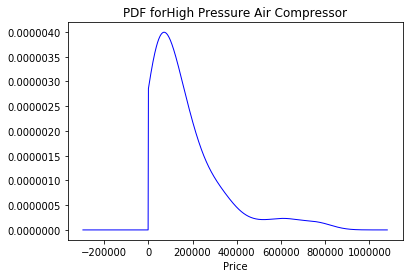

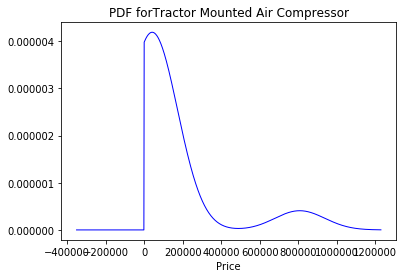

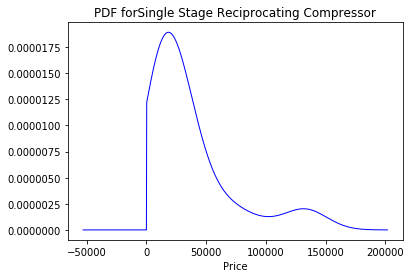

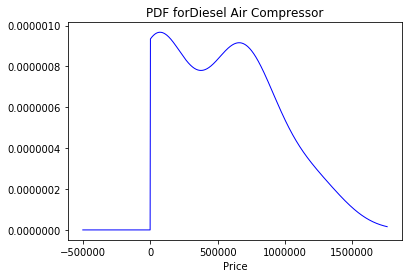

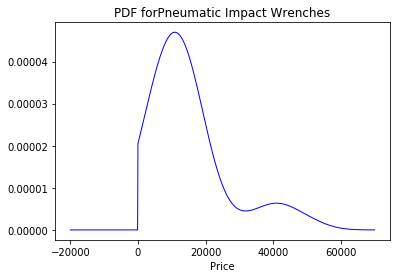

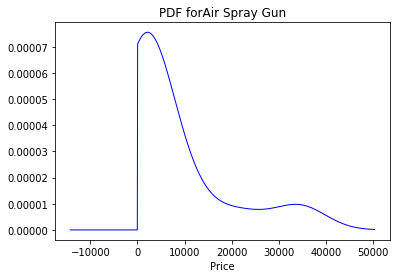

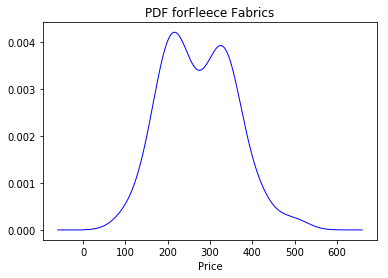

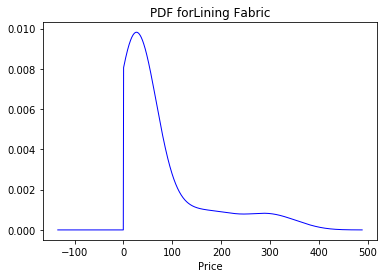

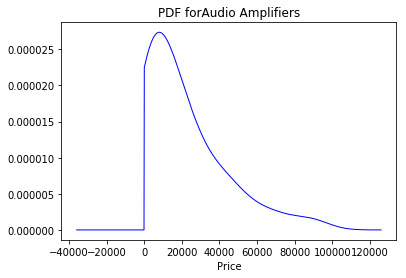

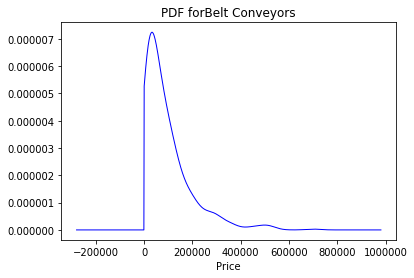

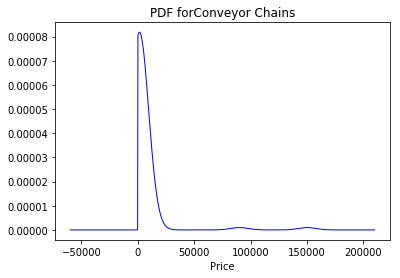

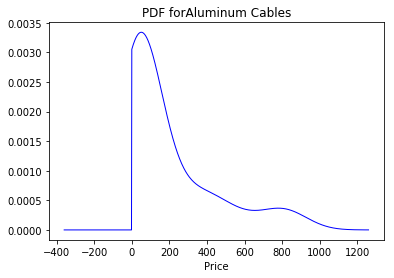

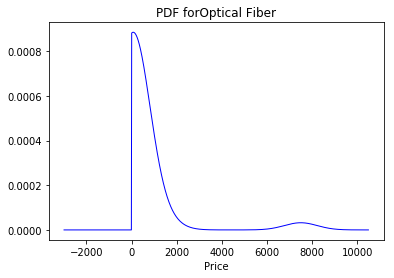

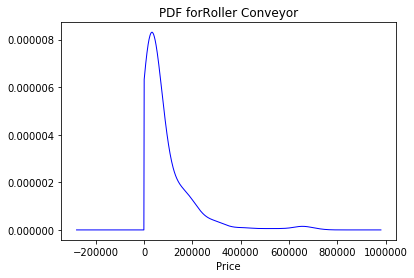

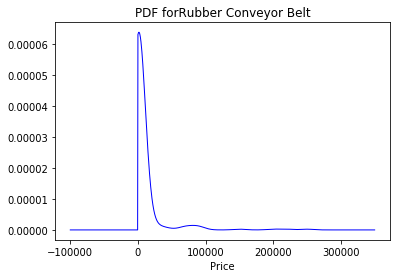

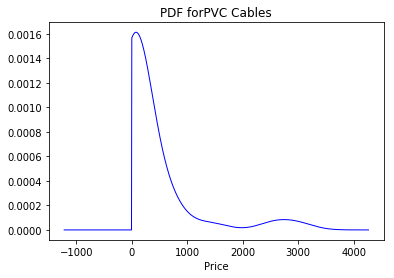

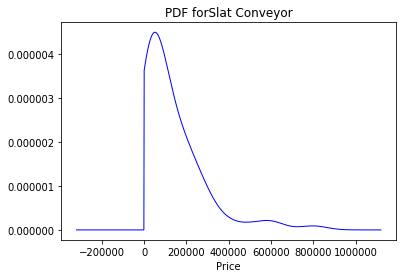

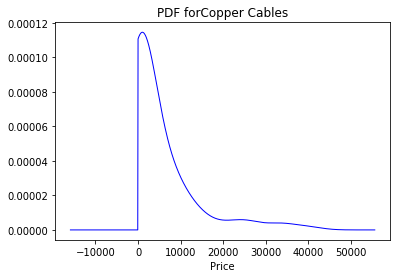

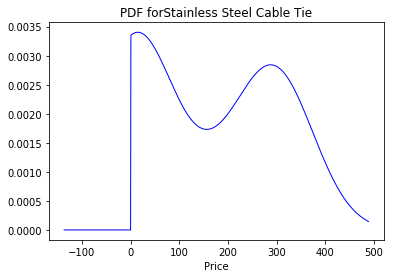

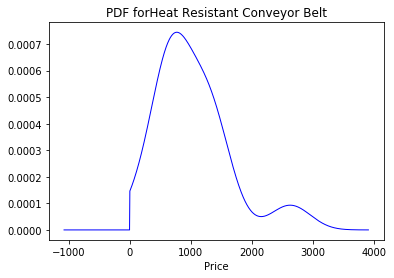

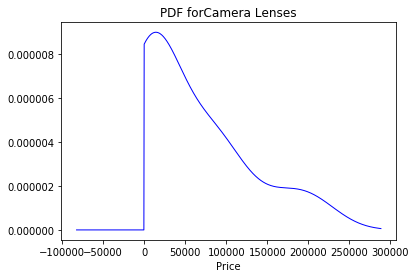

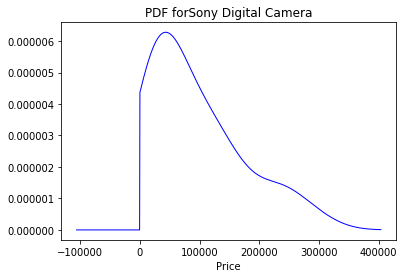

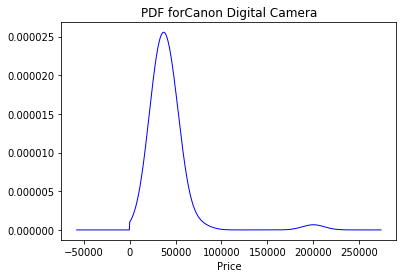

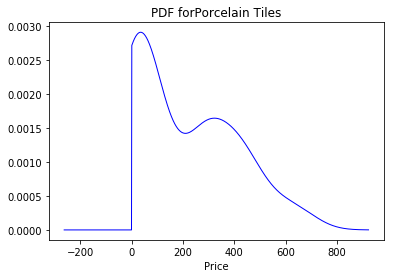

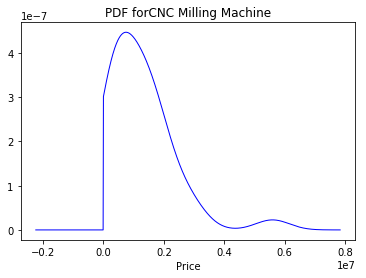

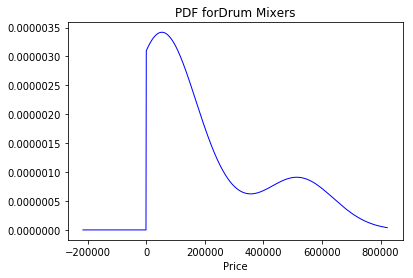

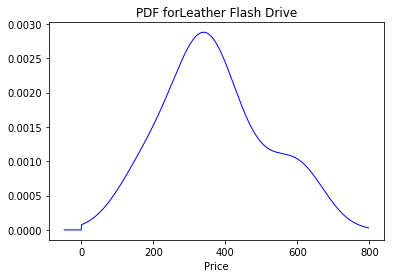

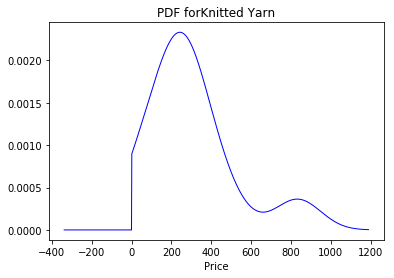

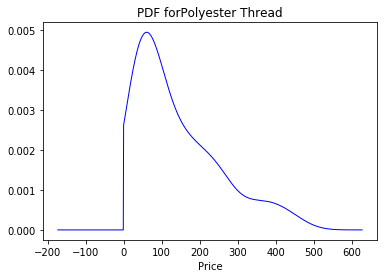

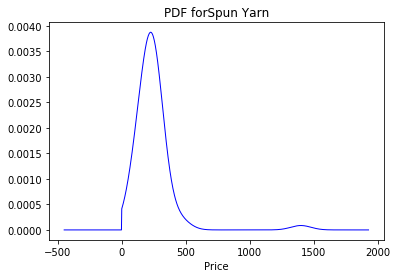

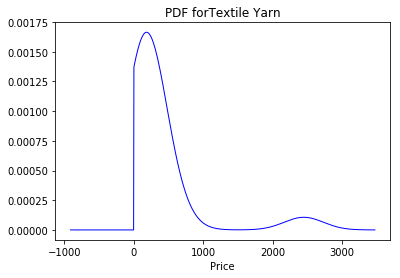

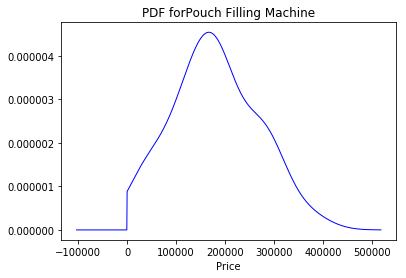

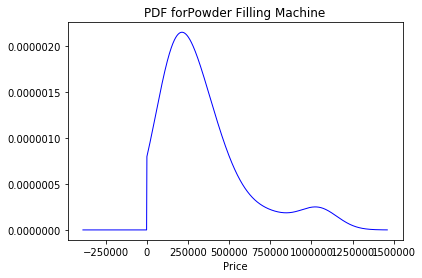

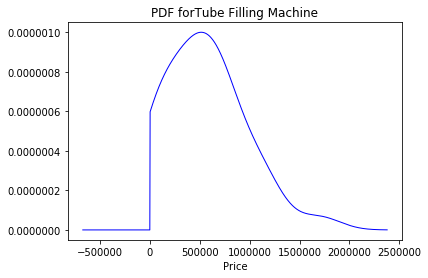

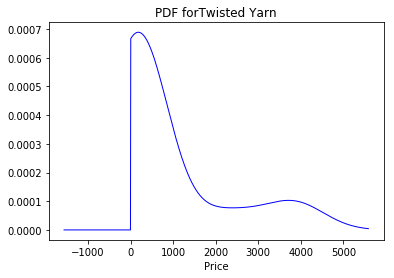

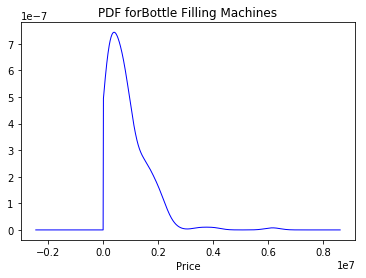

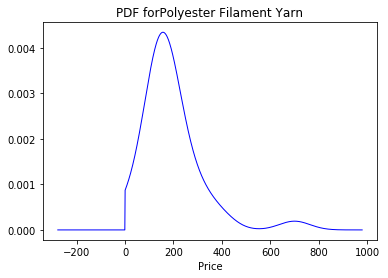

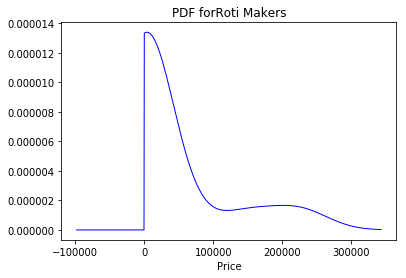

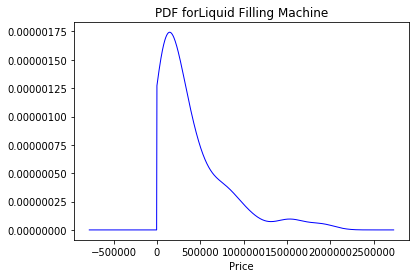

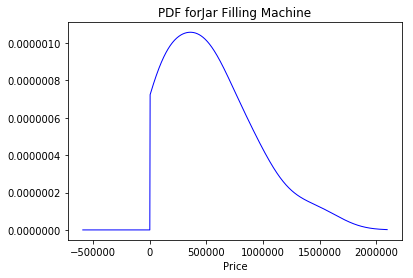

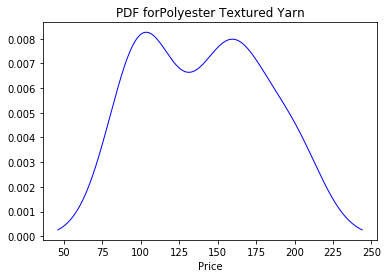

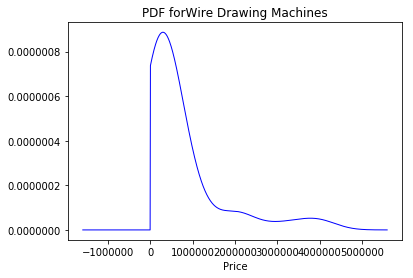

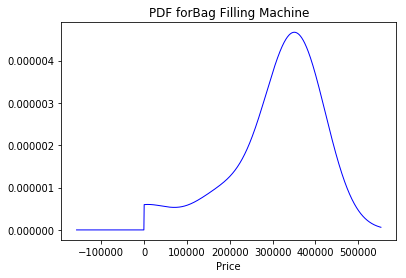

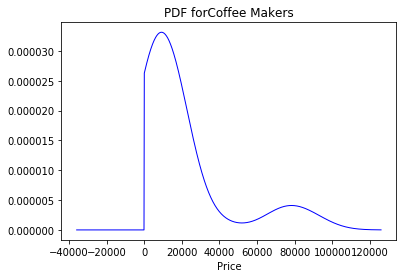

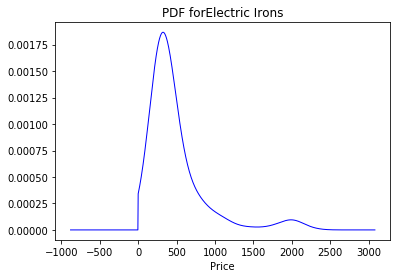

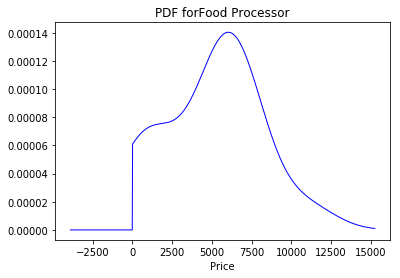

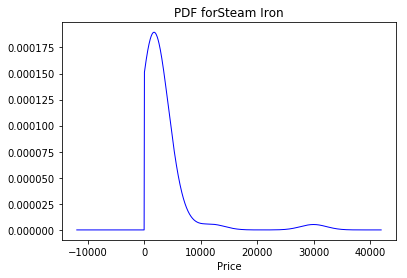

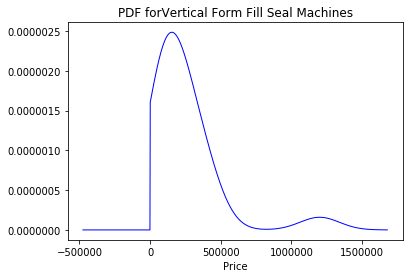

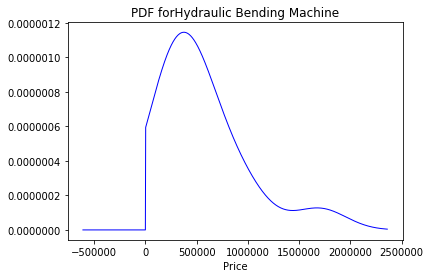

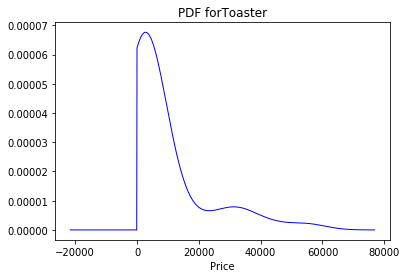

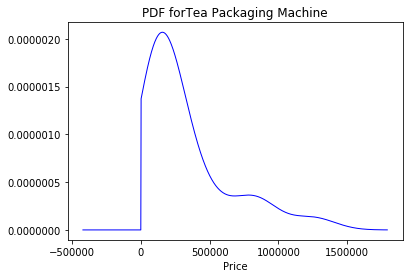

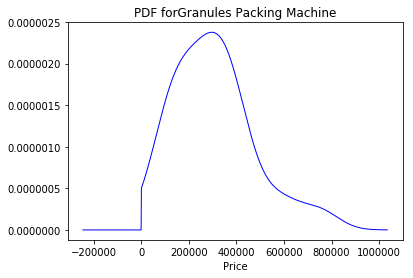

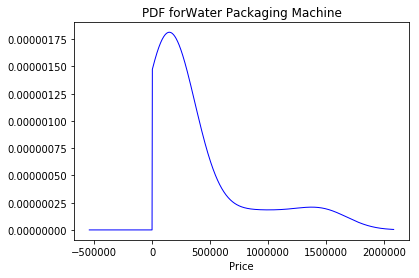

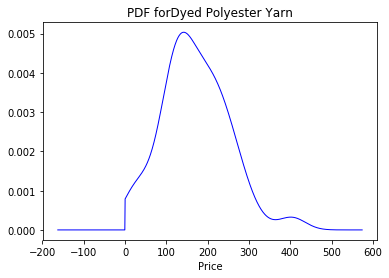

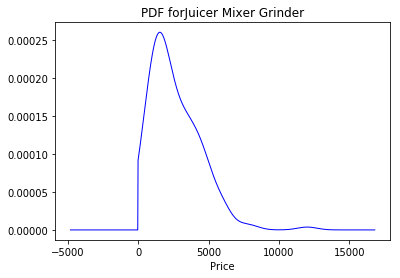

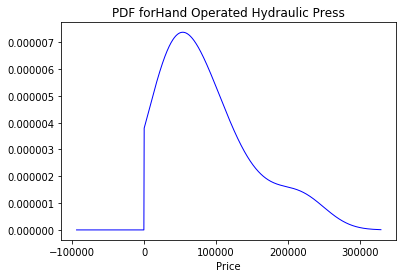

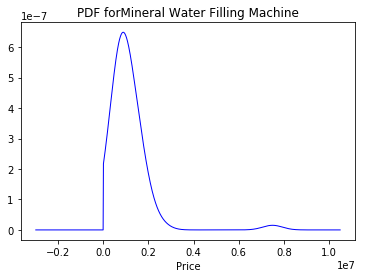

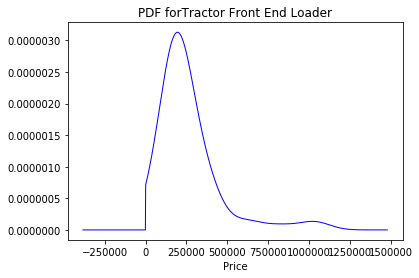

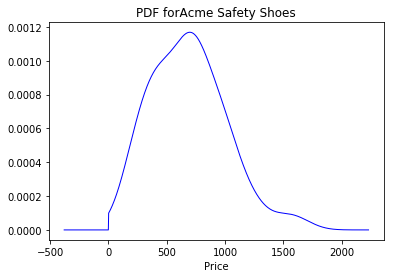

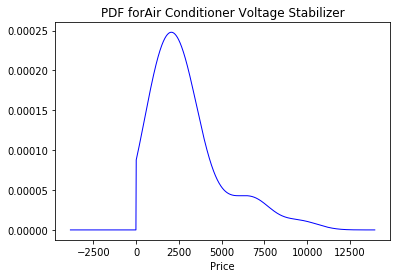

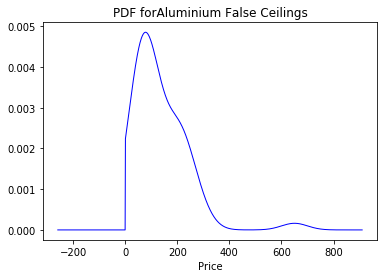

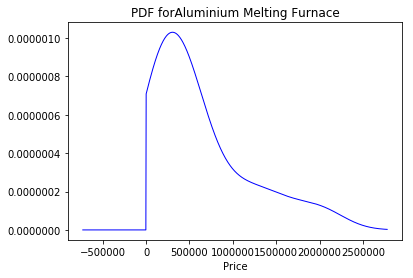

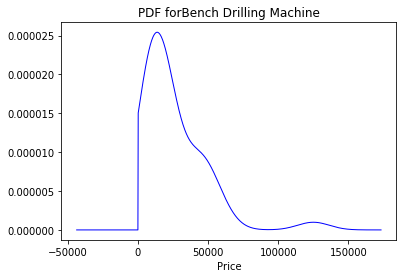

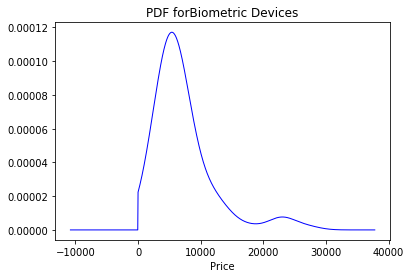

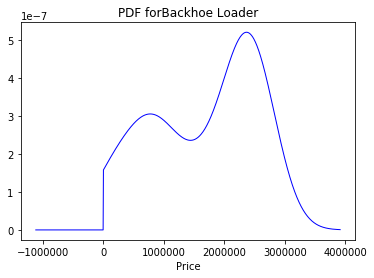

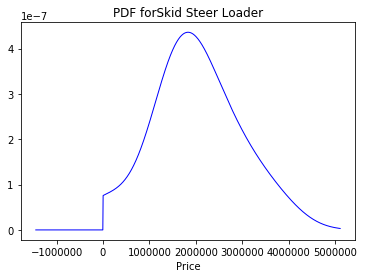

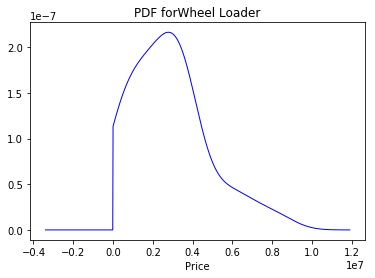

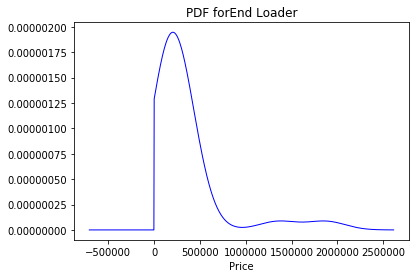

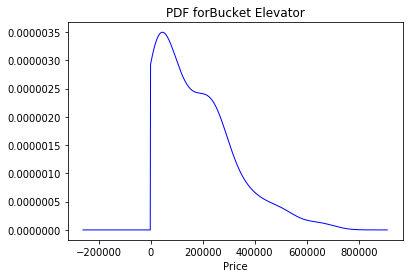

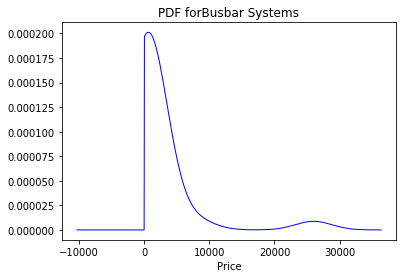

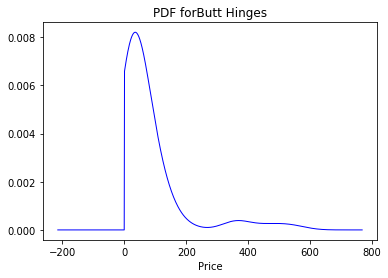

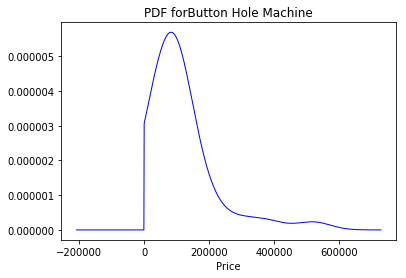

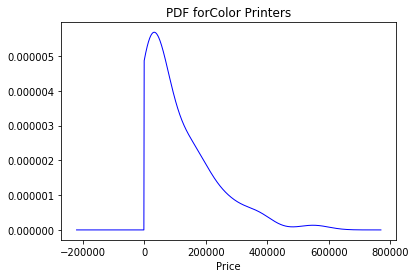

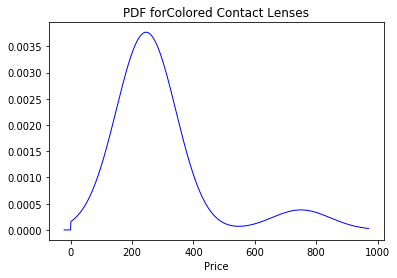

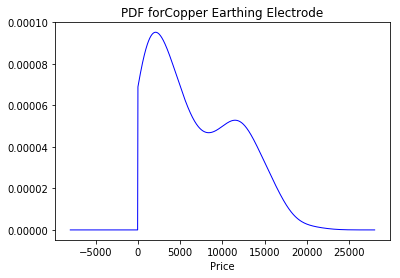

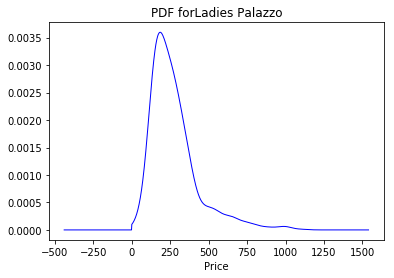

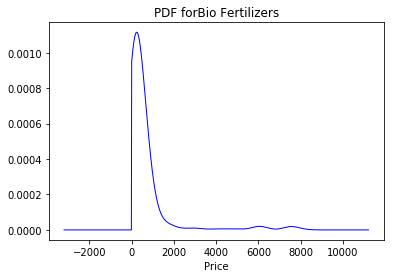

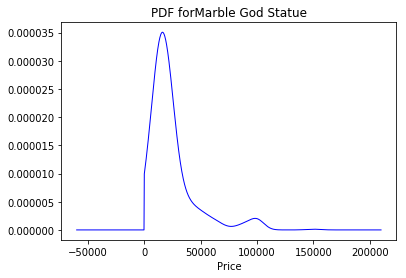

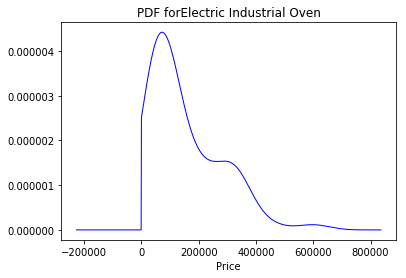

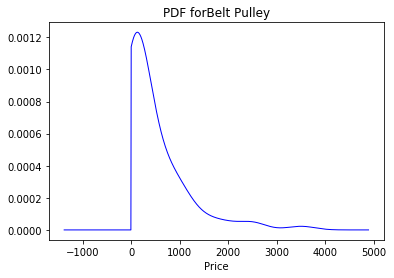

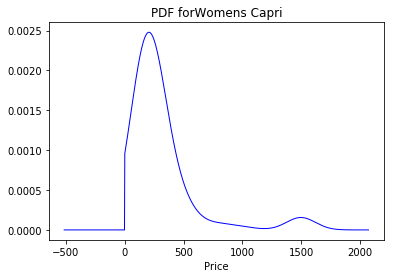

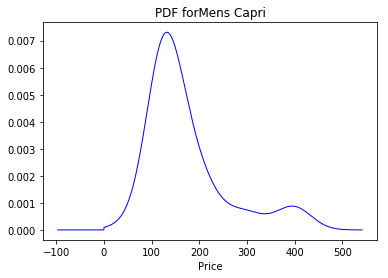

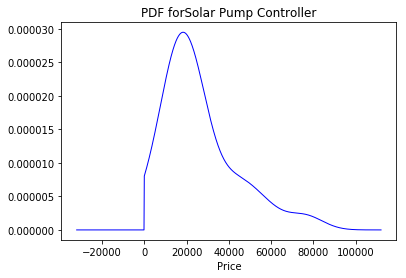

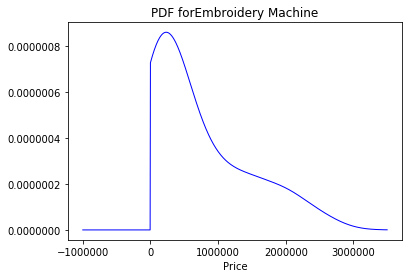

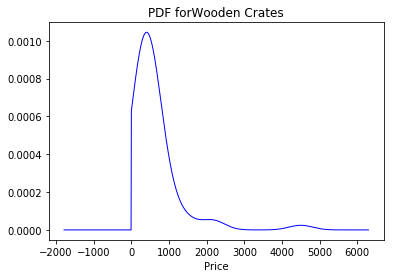

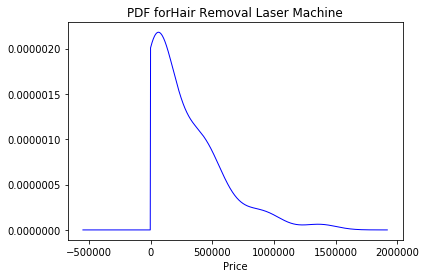

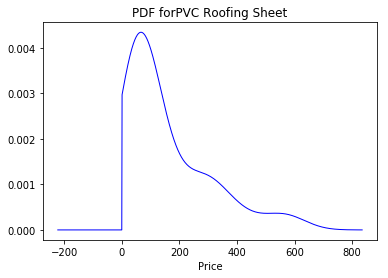

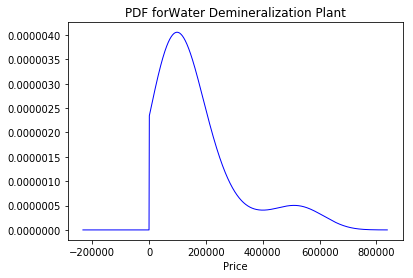

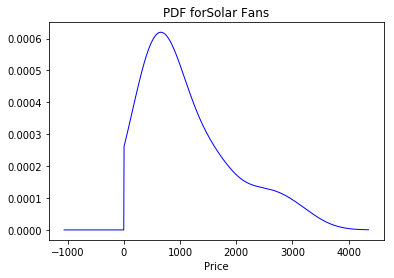

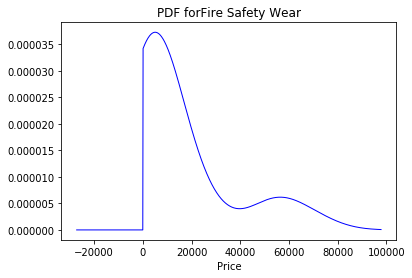

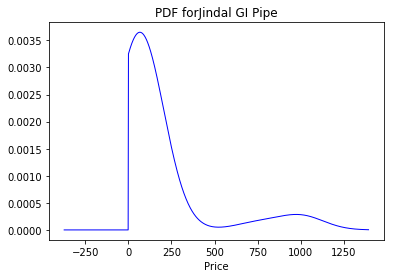

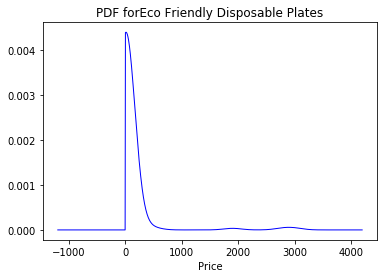

In [13]:
y_grid={}
ideal={}
pdf={}
w={}
for i in mc:
  y_grid[i]=np.linspace(np.amin(npa[i])-(np.amax(npa[i])-np.amin(npa[i]))*0.4,np.amax(npa[i])+(np.amax(npa[i])-np.amin(npa[i]))*0.4,1000)
  ideal[i]=1.06*(np.std(npa[i]))*((len(npa[i])**(-1/5)))
  pdf[i] = kde_scipy(npa[i], y_grid[i], bandwidth=ideal[i])
  w[i]=((np.amax(npa[i])-np.amin(npa[i]))*1.8)/1000
  pdf[i]=correct(pdf[i],w[i],y_grid[i])
  plt.plot(y_grid[i], pdf[i], color='blue', alpha=1, lw=1)
  plt.title('PDF for'+i)
  plt.xlabel('Price')
  plt.show()

In [0]:
w=((np.amax(npa)-np.amin(npa))*1.8)/10000
w1=((np.amax(npa1)-np.amin(npa1))*1.8)/10000
w2=((np.amax(npa2)-np.amin(npa2))*0.05+np.amax(npa2)*1.05)/10000
print(np.sum(pdf)*w,np.sum(pdf1)*w1,np.sum(pdf2)*w2)

0.9998999999997891 0.9998999824582104 0.9998531520797163


In [0]:
pdf_area=np.zeros(len(pdf)-1)
for a in range(len(pdf_area)):
  pdf_area[a]=(pdf[a]+pdf[a+1])*(w/2)
print(np.sum(pdf_area))


0.9998999999997866


before going to calculation for area we need to make sure that probability of a product price below Rupees 0 is 0( for PDF calculated above we have finite probability for price less than 0 ) we can usee bayes theorem to re calculate the PDF.

\begin{equation*}
PDF(x | Price > 0)   = \frac{probab(x>0)*PDF(x)}{probab(Price >0)}
\end{equation*}
here PDF(x) is the pdf function 

probab(price >0) is probabilty that price >0 which sum of area under pdf for price >0

probab(x>0) is eiter 1 or 0 depending on x

In [14]:
for a in range(len(pdf)):
  if y_grid[a] > 0:
    break
probab=np.sum(pdf[a:])*w
for a in range(len(pdf)):
  if y_grid[a] > 0:
    break
  pdf[a]=0
pdf=pdf/probab
print(np.sum(pdf)*w)
plt.plot(y_grid, pdf, color='blue', alpha=1, lw=1)
plt.title('PDF for drill')
plt.xlabel('Price')
plt.show()

KeyError: ignored

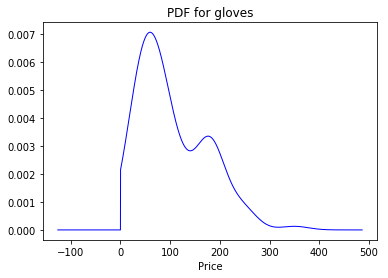

In [0]:
for a in range(len(pdf1)):
  if y_grid1[a] > 0:
    break
probab1=np.sum(pdf1[a:])*w1
for a in range(len(pdf1)):
  if y_grid1[a] > 0:
    break
  pdf1[a]=0
pdf1=pdf1/probab1
plt.plot(y_grid1, pdf1, color='blue', alpha=1, lw=1)
plt.title('PDF for gloves')
plt.xlabel('Price')
plt.show()

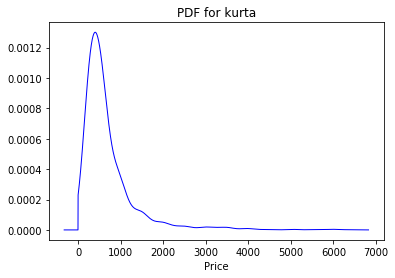

In [0]:
for a in range(len(pdf2)):
  if y_grid2[a] > 0:
    break
probab2=np.sum(pdf2[a:])*w2
for a in range(len(pdf2)):
  if y_grid2[a] > 0:
    break
  pdf2[a]=0
pdf2=pdf2/probab2
plt.plot(y_grid2, pdf2, color='blue', alpha=1, lw=1)
plt.title('PDF for kurta')
plt.xlabel('Price')
plt.show()

# Range calculation from PDF 
we used 2 methods for calculating a range they are 

1.   finding the peak and finding a range which covers 50% of the area under pdf and having peak as mean point of that range(it means there is 50% chance for a product to be in that range) this ensures price which has maximum entries lies in that region

2.   finding the smallest range which covers majority of the region(we can use range which covers 50% of the region)the advantage with this method is it ensures ranges is minimum.



In [0]:
def range1(pdf,w,lent,npa):
  for q in range(0,lent):
    for p in range(0,lent-(q+1)):
      if np.sum(pdf[p:p+q+1])*w > 0.5:
        print(np.sum(pdf[p:p+q+1])*w,p,q)
        break
    if np.sum(pdf[p:p+q+1])*w > 0.5:
      break
  return np.round((p)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4),np.round((p+q+1)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4),(np.sum(pdf[p:p+q+1])*w,p,q)

In [16]:
len(pdf['AC Motors'])

1000

In [24]:
range1(pdf['AC Motors'],w['AC Motors'],1000,npa['AC Motors'])

0.500663260524841 223 78


(101.0, 5783.0, (0.500663260524841, 223, 78))

In [25]:
for i in mc:
  print('This is the range obtained for'+i,range1(pdf[i],w[i],len(pdf[i]),npa[i]))
  

0.5001728691648768 229 64
This is the range obtained forHMI Touch Panel (2842.0, 20509.0, (0.5001728691648768, 229, 64))
0.500663260524841 223 78
This is the range obtained forAC Motors (101.0, 5783.0, (0.500663260524841, 223, 78))
0.5003035322135936 281 91
This is the range obtained forSingle Phase Induction Motors (2117.0, 5428.0, (0.5003035322135936, 281, 91))
0.5029459808468736 212 69
This is the range obtained forThree Phase Induction Motor (115.0, 11788.0, (0.5029459808468736, 212, 69))
0.5010273384341093 221 56
This is the range obtained forRefrigeration Compressors (64.0, 71719.0, (0.5010273384341093, 221, 56))
0.5019067717860058 222 52
This is the range obtained forCompressor Oil (-11.0, 2794.0, (0.5019067717860058, 222, 52))
0.5000004820843271 200 275
This is the range obtained forDesiccant Dryers (9080.0, 45346.0, (0.5000004820843271, 200, 275))
0.5011150556085058 227 73
This is the range obtained forRotary Screw Compressors (17448.0, 283815.0, (0.5011150556085058, 227, 73))

In [0]:
f_peak=argrelextrema(pdf, np.greater)[0][0]
for q in range(f_peak):
  if np.sum(pdf[f_peak-q:f_peak+q])*w > 0.5:
    print(np.sum(pdf[f_peak-q:f_peak+q])*w,q)
    break
print('This is the range obtained for drill ',np.round((f_peak-q)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4),np.round((f_peak+q)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4))

0.5000541938213798 330
This is the range obtained for drill  711.0 4038.0


In [0]:
f_peak1=argrelextrema(pdf1, np.greater)[0][0]
q=0
for q in range(f_peak1):
  if np.sum(pdf1[f_peak1-q:f_peak1+2*q])*w1 > 0.5:
    print(np.sum(pdf1[f_peak1-q:f_peak1+2*q])*w1,q)
    break
print('This is the range obtained for gloves ',np.round((f_peak1-q)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4),np.round((f_peak1+2*q)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4))

0.5002469522162393 460
This is the range obtained for gloves  31.0 116.0


In [0]:
f_peak2=argrelextrema(pdf2, np.greater)[0][0]
for q in range(f_peak2):
  if np.sum(pdf2[f_peak2-q:f_peak2+q])*w2 > 0.5:
    print(np.sum(pdf2[f_peak2-q:f_peak2+q])*w2,q)
    break
print('This is the range obtained for Kurta ',np.round((f_peak2-q)*w2-(np.amax(npa2)-np.amin(npa2))*0.05),np.round((f_peak2+q)*w2-(np.amax(npa2)-np.amin(npa2))*0.05))

0.5004857371061543 301
This is the range obtained for Kurta  188.0 619.0


In [0]:
qq1=len(pdf)
for q in range(len(pdf)):
  for p in range(len(pdf)-(q+1)):
     if np.sum(pdf[p:p+q+1])*w > 0.5:
        print(np.sum(pdf[p:p+q+1])*w,p,q)
        break
  if np.sum(pdf[p:p+q+1])*w > 0.5:
    break
print('This is the range obtained for drill ',np.round((p)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4),np.round((p+q+1)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4))  
     
        

0.5000100077814926 2362 659
This is the range obtained for drill  706.0 4033.0


In [0]:
qq2=len(pdf1)
for q in range(len(pdf1)):
  for p in range(len(pdf1)-(q+1)):
     if np.sum(pdf1[p:p+q+1])*w1 > 0.75:
        print(np.sum(pdf1[p:p+q+1])*w1,p,q)
        break
  if np.sum(pdf1[p:p+q+1])*w1 > 0.5:
    break
print('This is the range obtained for gloves ',np.round((p)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4),np.round((p+q+1)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4))  
 

0.7500014076419566 2210 2569
This is the range obtained for gloves  9.0 167.0


In [0]:
qq3=len(pdf2)
for q in range(len(pdf2)):
  for p in range(len(pdf2)-(q+1)):
     if np.sum(pdf2[p:p+q+1])*w2 > 0.7:
        print(np.sum(pdf2[p:p+q+1])*w2,p,q)
        break
  if np.sum(pdf2[p:p+q+1])*w2 > 0.6:
    break
print('This is the range obtained for Kurta ',np.round((p)*w2-(np.amax(npa2)-np.amin(npa2))*0.05),np.round((p+q+1)*w2-(np.amax(npa2)-np.amin(npa2))*0.05))

0.7000112909128123 589 991
This is the range obtained for Kurta  96.0 805.0
